In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
data_tcb = pd.read_csv("TCB Historical Data.csv")
data_bid = pd.read_csv("BID Historical Data.csv")
data_vcb = pd.read_csv("VCB Historical Data.csv")
data_ctg = pd.read_csv("CTG Historical Data.csv")
data_bank = [data_tcb, data_vcb, data_bid, data_ctg]
data_tcb

,Date,Price,Open,High,Low,Vol.,Change %
0,12/29/2023,"31,800.0","31,700.0","31,950.0","31,500.0",4.23M,0.95%
1,12/28/2023,"31,500.0","30,900.0","31,650.0","30,900.0",5.75M,2.11%
2,12/27/2023,"30,850.0","30,850.0","31,150.0","30,850.0",2.02M,0.16%
3,12/26/2023,"30,800.0","30,850.0","31,000.0","30,750.0",1.51M,-0.48%
4,12/25/2023,"30,950.0","30,800.0","31,000.0","30,600.0",2.57M,1.14%
...,...,...,...,...,...,...,...
995,01/08/2020,"22,750.0","22,800.0","23,050.0","22,600.0",1.71M,-1.94%
996,01/07/2020,"23,200.0","23,050.0","23,200.0","23,000.0",1.04M,0.65%
997,01/06/2020,"23,050.0","23,400.0","23,400.0","23,050.0",1.16M,-2.54%
998,01/03/2020,"23,650.0","23,900.0","23,950.0","23,650.0",756.70K,-0.63%


In [3]:
#We reverse the order of table
for i in range(len(data_bank)):
    data_bank[i]['Date'] = pd.to_datetime(data_bank[i]['Date'])
    data_bank[i] = data_bank[i].iloc[::-1]
    data_bank[i] = data_bank[i].drop(['Open', 'High', 'Low', 'Change %'],axis = 1)
data_tcb, data_bid, data_vcb, data_ctg = data_bank

In [4]:
data_ctg

,Date,Price,Vol.
999,2020-01-02,"16,030.2",5.61M
998,2020-01-03,"15,881.1",4.68M
997,2020-01-06,"15,918.4",4.10M
996,2020-01-07,"16,179.3",5.37M
995,2020-01-08,"16,142.1",12.73M
...,...,...,...
4,2023-12-25,"26,900.0",4.08M
3,2023-12-26,"26,800.0",3.25M
2,2023-12-27,"26,850.0",3.01M
1,2023-12-28,"27,100.0",2.98M


In [5]:
type(data_bank)

list

EDA (Exploring data analysis)


In [6]:
#First we will check wheather the data is start and end
start = data_bank[0]['Date'].iloc[0]
end = data_bank[0]['Date'].iloc[-1]
print(f"The data is start from {start} and end at {end} ")


The data is start from 2020-01-02 00:00:00 and end at 2023-12-29 00:00:00 


In [7]:
#Because the Price Open High Low Vol data type is object, we change it into integer

def clean_and_convert(column):
    if isinstance(column, float):  # Kiểm tra nếu giá trị là float
        return column  # Giữ nguyên nếu là float
    else:
        column = str(column)  # Chuyển thành chuỗi nếu không phải float
        column = column.replace(',', '')  # Loại bỏ dấu phẩy
        return column

for i in range (len(data_bank)):
    data_bank[i]['Price'] = data_bank[i]['Price'].apply(clean_and_convert)
    
    data_bank[i]['Price'] = pd.to_numeric(data_bank[i]['Price'])
data_tcb, data_bid, data_vcb, data_ctg = data_bank

In [8]:
data_tcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 999 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Price   1000 non-null   float64       
 2   Vol.    1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.6+ KB


In [9]:
#We also convert the Volumne into nummeric
def convert_volume(value):
    if 'M' in value:
        return float(value.replace('M', '').replace(',', '')) * 1_000_000
    elif 'K' in value:
        return float(value.replace('K', '').replace(',', '')) * 1_000
    else:
        return float(value.replace(',', ''))

# Áp dụng hàm convert_volume lên cột Volume
for i in range (len(data_bank)):
    data_bank[i]['Vol.'] = data_bank[i]['Vol.'].apply(convert_volume)
    data_bank[i]['Vol.'] = pd.to_numeric(data_bank[i]['Vol.'])

In [10]:
data_bank[0].describe()

,Date,Price,Vol.
count,1000,1000.000000,1.000000e+03
mean,2022-01-02 22:10:33.600000,34196.750000,8.332681e+06
min,2020-01-02 00:00:00,14900.000000,5.460100e+05
25%,2020-12-29 18:00:00,24387.500000,2.900000e+06
50%,2021-12-29 12:00:00,32325.000000,5.440000e+06
75%,2022-12-29 06:00:00,42162.500000,1.196250e+07
max,2023-12-29 00:00:00,58000.000000,5.824000e+07
std,NaN,11135.370825,7.657223e+06


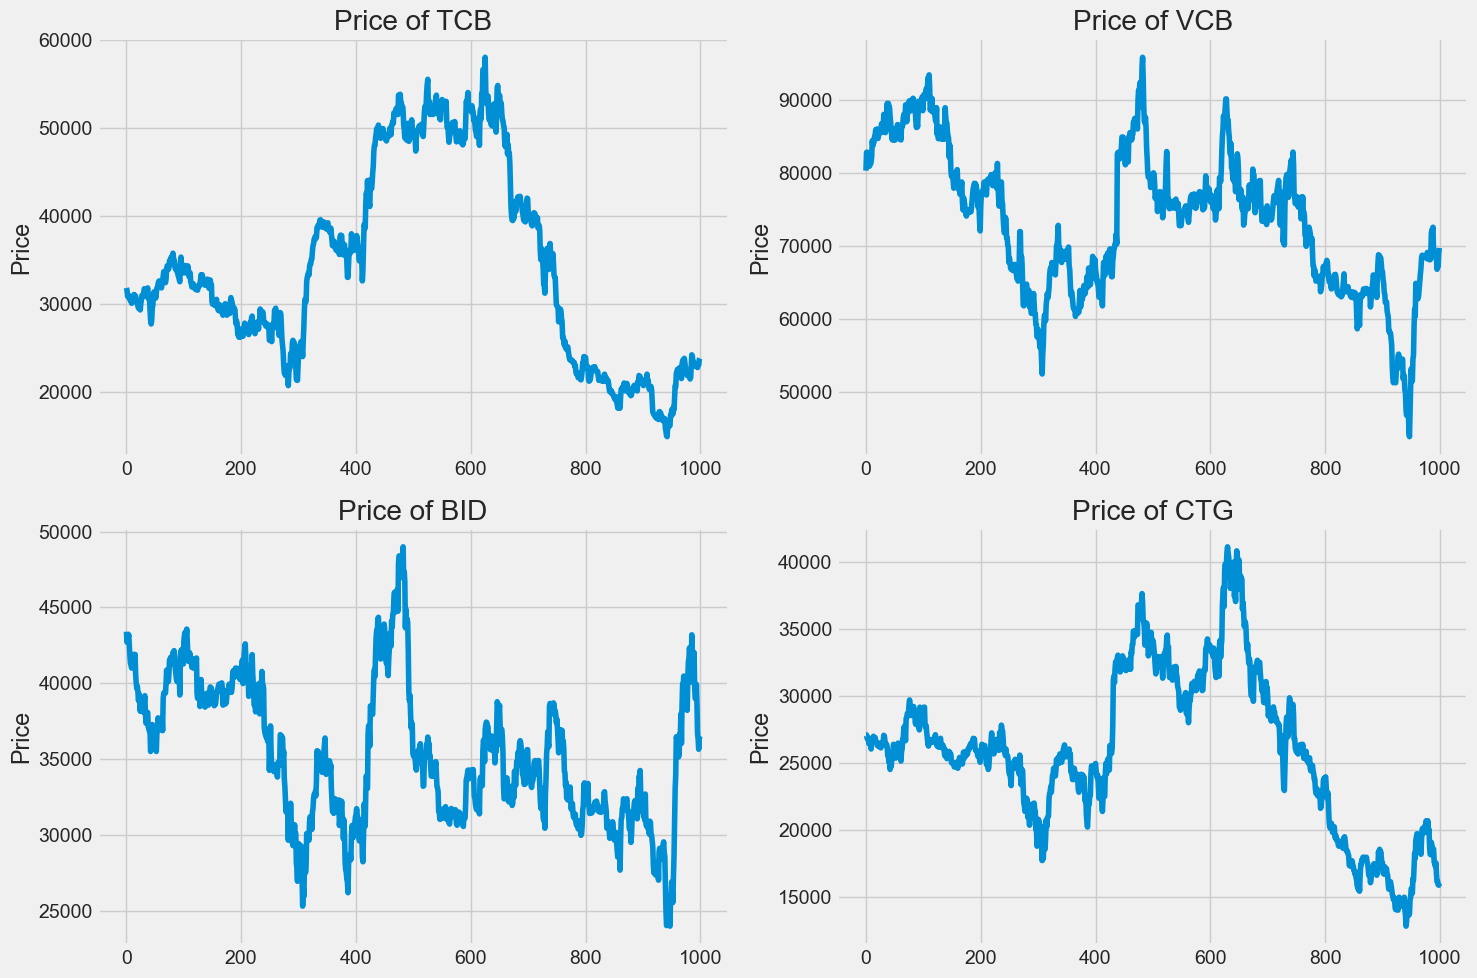

In [11]:
#Plot the data 
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, (name, bank) in enumerate(zip(['TCB','VCB','BID','CTG'],data_bank),1):
    
    plt.subplot(2, 2, i)  
    bank['Price'].plot()
    plt.ylabel('Price')
    plt.xlabel(None)
    plt.title(f'Price of {name}')


plt.tight_layout()


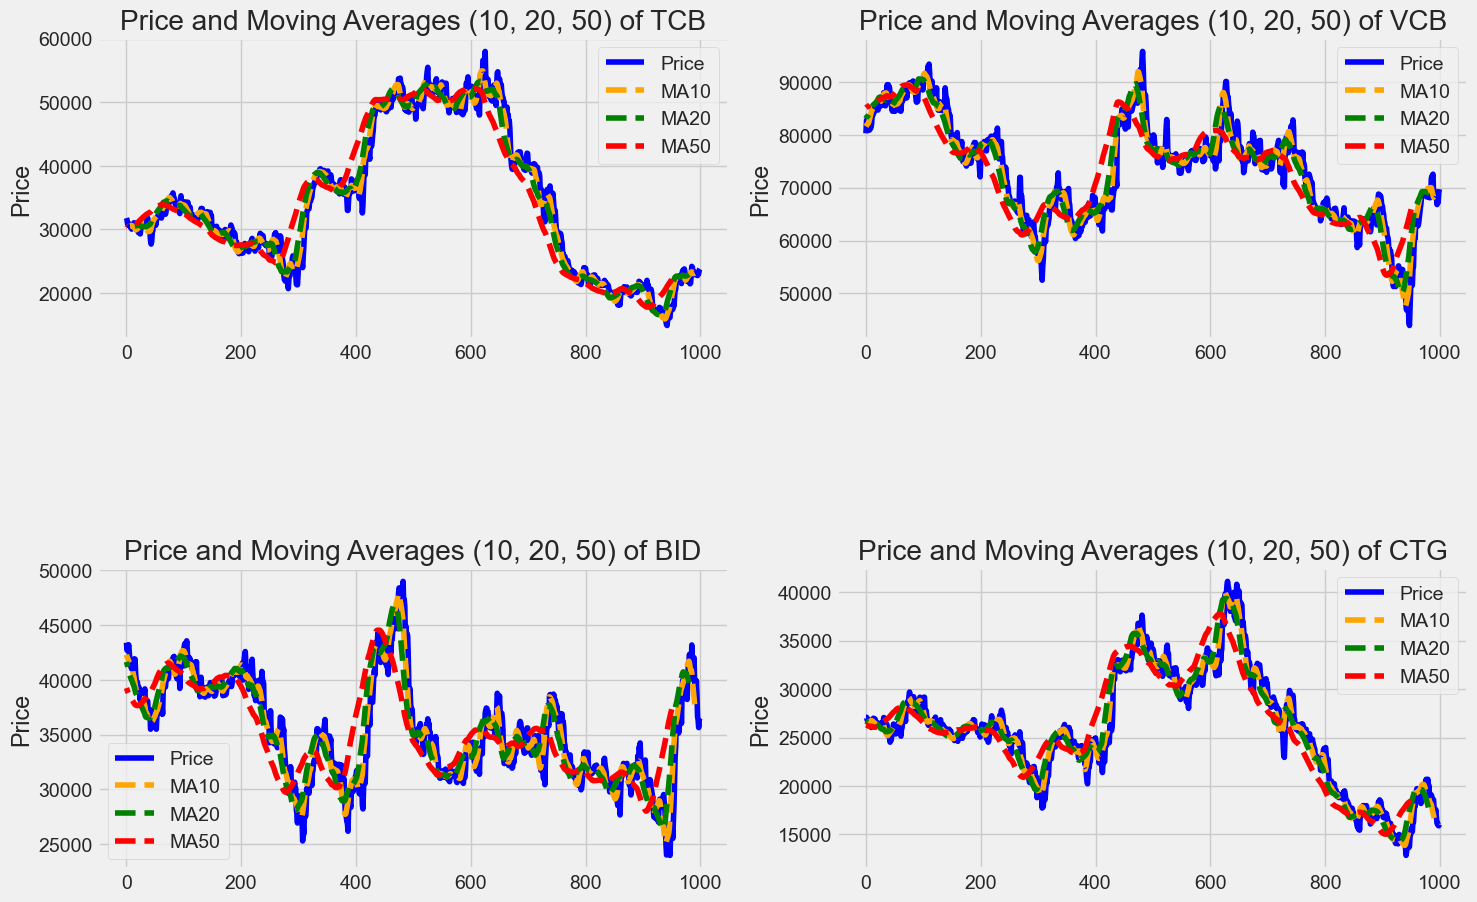

In [12]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# MA windows for 10, 20, 50 days
ma_windows = [10, 20, 50]

for i, (name, bank) in enumerate(zip(['TCB', 'VCB', 'BID', 'CTG'], data_bank), 1):
    
    # Calculate Moving Averages (MA10, MA20, MA50) without adding to DataFrame
    ma10 = bank['Price'].rolling(window=ma_windows[0]).mean()
    ma20 = bank['Price'].rolling(window=ma_windows[1]).mean()
    ma50 = bank['Price'].rolling(window=ma_windows[2]).mean()

    # Plot price and moving averages
    plt.subplot(2, 2, i)
    bank['Price'].plot(label='Price', color='blue')
    ma10.plot(label='MA10', color='orange', linestyle='--')
    ma20.plot(label='MA20', color='green', linestyle='--')
    ma50.plot(label='MA50', color='red', linestyle='--')
    
    # Set labels and title
    plt.ylabel('Price')
    plt.xlabel(None)
    plt.title(f'Price and Moving Averages (10, 20, 50) of {name}')
    plt.legend()

plt.tight_layout()
plt.show()


We see in the graph that the best values to measure the moving average are 50 days because we still capture trends in the data without overfitt

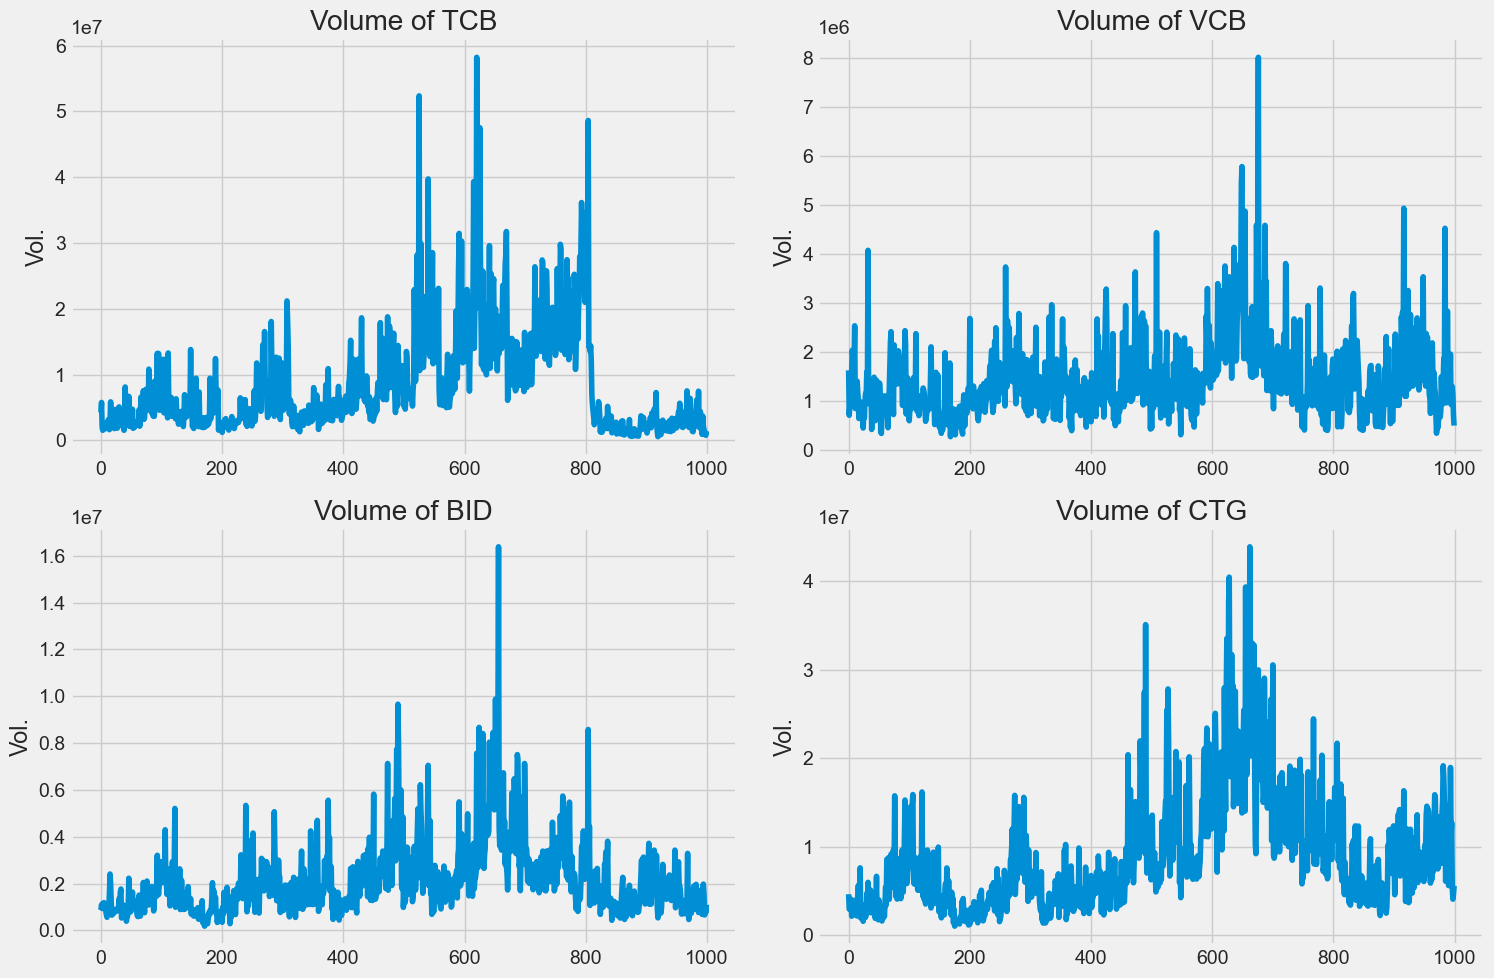

In [13]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, (name, bank) in enumerate(zip(['TCB','VCB','BID','CTG'],data_bank),1):
    
    plt.subplot(2, 2, i)  
    bank['Vol.'].plot()
    plt.ylabel('Vol.')
    plt.xlabel(None)
    plt.title(f'Volume of {name}')


plt.tight_layout()

In [14]:
data_bank[0].columns

Index(['Date', 'Price', 'Vol.'], dtype='object')

In [15]:
ref_data_bank = data_bank.copy()
for i, df in enumerate(ref_data_bank):
    df.rename(columns=lambda x: f"{x}_{i}" if x != 'Date' else x, inplace=True)

# Bắt đầu merge từ DataFrame đầu tiên
merged_data = ref_data_bank[0]

# Merge từng DataFrame vào merged_data
for df in data_bank[1:]:
    merged_data = pd.merge(merged_data, df, on='Date', how='outer')

print(merged_data)

          Date  Price_0     Vol._0  Price_1     Vol._1  Price_2     Vol._2  \
0   2020-01-02  23800.0  1390000.0    69728   492910.0  36500.1  1100000.0   
1   2020-01-03  23650.0   756700.0    69037   684100.0  36344.4   759580.0   
2   2020-01-06  23050.0  1160000.0    67194  1120000.0  35644.0   999230.0   
3   2020-01-07  23200.0  1040000.0    67424  1290000.0  36344.4   662670.0   
4   2020-01-08  22750.0  1710000.0    66810   921630.0  36655.7  1550000.0   
..         ...      ...        ...      ...        ...      ...        ...   
995 2023-12-25  30950.0  2570000.0    81800  1300000.0  43200.0  1170000.0   
996 2023-12-26  30800.0  1510000.0    82800   971200.0  43000.0  1160000.0   
997 2023-12-27  30850.0  2020000.0    82700   899600.0  43000.0   938900.0   
998 2023-12-28  31500.0  5750000.0    82800   703200.0  42700.0  1100000.0   
999 2023-12-29  31800.0  4230000.0    80300  1620000.0  43400.0   882100.0   

     Price_3      Vol._3  
0    16030.2   5610000.0  
1    1588

In [16]:
merged_data

,Date,Price_0,Vol._0,Price_1,Vol._1,Price_2,Vol._2,Price_3,Vol._3
0,2020-01-02,23800.0,1390000.0,69728,492910.0,36500.1,1100000.0,16030.2,5610000.0
1,2020-01-03,23650.0,756700.0,69037,684100.0,36344.4,759580.0,15881.1,4680000.0
2,2020-01-06,23050.0,1160000.0,67194,1120000.0,35644.0,999230.0,15918.4,4100000.0
3,2020-01-07,23200.0,1040000.0,67424,1290000.0,36344.4,662670.0,16179.3,5370000.0
4,2020-01-08,22750.0,1710000.0,66810,921630.0,36655.7,1550000.0,16142.1,12730000.0
...,...,...,...,...,...,...,...,...,...
995,2023-12-25,30950.0,2570000.0,81800,1300000.0,43200.0,1170000.0,26900.0,4080000.0
996,2023-12-26,30800.0,1510000.0,82800,971200.0,43000.0,1160000.0,26800.0,3250000.0
997,2023-12-27,30850.0,2020000.0,82700,899600.0,43000.0,938900.0,26850.0,3010000.0
998,2023-12-28,31500.0,5750000.0,82800,703200.0,42700.0,1100000.0,27100.0,2980000.0


In [17]:
price_columns = [col for col in merged_data.columns if col.startswith('Price')]

# Tạo DataFrame chỉ với các cột giá
price_data = merged_data[price_columns]

In [18]:
correlation_matrix = price_data.corr()

# Hiển thị ma trận hệ số tương quan
print(correlation_matrix)

          Price_0   Price_1   Price_2   Price_3
Price_0  1.000000  0.532713  0.276231  0.896806
Price_1  0.532713  1.000000  0.782491  0.729931
Price_2  0.276231  0.782491  1.000000  0.488675
Price_3  0.896806  0.729931  0.488675  1.000000


<Axes: >

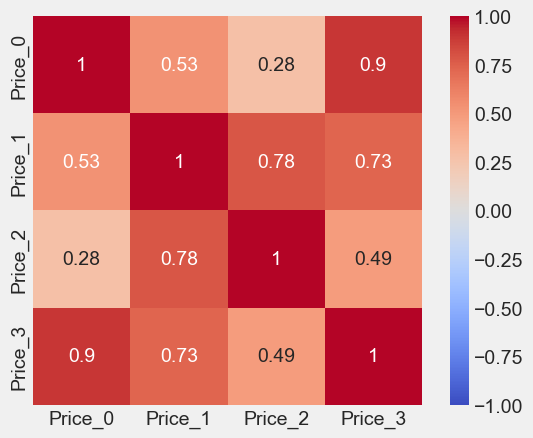

In [19]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True)

We can see that the CTG stock is impressively high correlated with TCB 

In [20]:
merged_data.columns

Index(['Date', 'Price_0', 'Vol._0', 'Price_1', 'Vol._1', 'Price_2', 'Vol._2',
       'Price_3', 'Vol._3'],
      dtype='object')

In [21]:
merged_data = merged_data.drop(['Price_1', 'Vol._1', 'Price_2', 'Vol._2'],axis = 1)

In [22]:
merged_data

,Date,Price_0,Vol._0,Price_3,Vol._3
0,2020-01-02,23800.0,1390000.0,16030.2,5610000.0
1,2020-01-03,23650.0,756700.0,15881.1,4680000.0
2,2020-01-06,23050.0,1160000.0,15918.4,4100000.0
3,2020-01-07,23200.0,1040000.0,16179.3,5370000.0
4,2020-01-08,22750.0,1710000.0,16142.1,12730000.0
...,...,...,...,...,...
995,2023-12-25,30950.0,2570000.0,26900.0,4080000.0
996,2023-12-26,30800.0,1510000.0,26800.0,3250000.0
997,2023-12-27,30850.0,2020000.0,26850.0,3010000.0
998,2023-12-28,31500.0,5750000.0,27100.0,2980000.0


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)

In [25]:
merged_data

,Price_0,Vol._0,Price_3,Vol._3
Date,,,,
2020-01-02,23800.0,1390000.0,16030.2,5610000.0
2020-01-03,23650.0,756700.0,15881.1,4680000.0
2020-01-06,23050.0,1160000.0,15918.4,4100000.0
2020-01-07,23200.0,1040000.0,16179.3,5370000.0
2020-01-08,22750.0,1710000.0,16142.1,12730000.0
...,...,...,...,...
2023-12-25,30950.0,2570000.0,26900.0,4080000.0
2023-12-26,30800.0,1510000.0,26800.0,3250000.0
2023-12-27,30850.0,2020000.0,26850.0,3010000.0


In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scale_merged_data = scaler.fit_transform(merged_data)

In [27]:
scale_merged_data

array([[0.20649652, 0.01462873, 0.11321781, 0.10639291],
       [0.20301624, 0.00365185, 0.10795244, 0.08469435],
       [0.18909513, 0.01064218, 0.10926966, 0.07116192],
       ...,
       [0.37006961, 0.02554842, 0.49531202, 0.04573028],
       [0.38515081, 0.09019986, 0.50414061, 0.04503033],
       [0.39211137, 0.06385396, 0.50414061, 0.08422772]])

In [28]:
x = merged_data[['Vol._0', 'Price_3', 'Vol._3']]
y = merged_data['Price_0']

In [29]:
split = int(len(merged_data) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [30]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [31]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [32]:
def create_dataset(x, y, time_step=60):
    x_data, y_data = [], []
    for i in range(len(x) - time_step - 1):
        x_data.append(x[i:(i + time_step)])
        y_data.append(y[i + time_step])
    return np.array(x_data), np.array(y_data)

time_step = 60
x_train, y_train = create_dataset(x_train, y_train, time_step)
x_test, y_test = create_dataset(x_test, y_test, time_step)

In [33]:
_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2]))

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.1)


Epoch 1/200


C:\Users\x\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1540 - val_loss: 0.0631
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0170 - val_loss: 0.0714
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0086 - val_loss: 0.0567
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0074 - val_loss: 0.0574
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0061 - val_loss: 0.0440
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0067 - val_loss: 0.0469
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0067 - val_loss: 0.0484
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0060 - val_loss: 0.0498
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0052 - val_loss: 0.0410
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046 - val_loss: 0.0552
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0045 - val_loss: 0.0417
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0

In [35]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(x_test)
predictions = scaler_y.inverse_transform(predictions)

y_test = scaler_y.inverse_transform(y_test)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


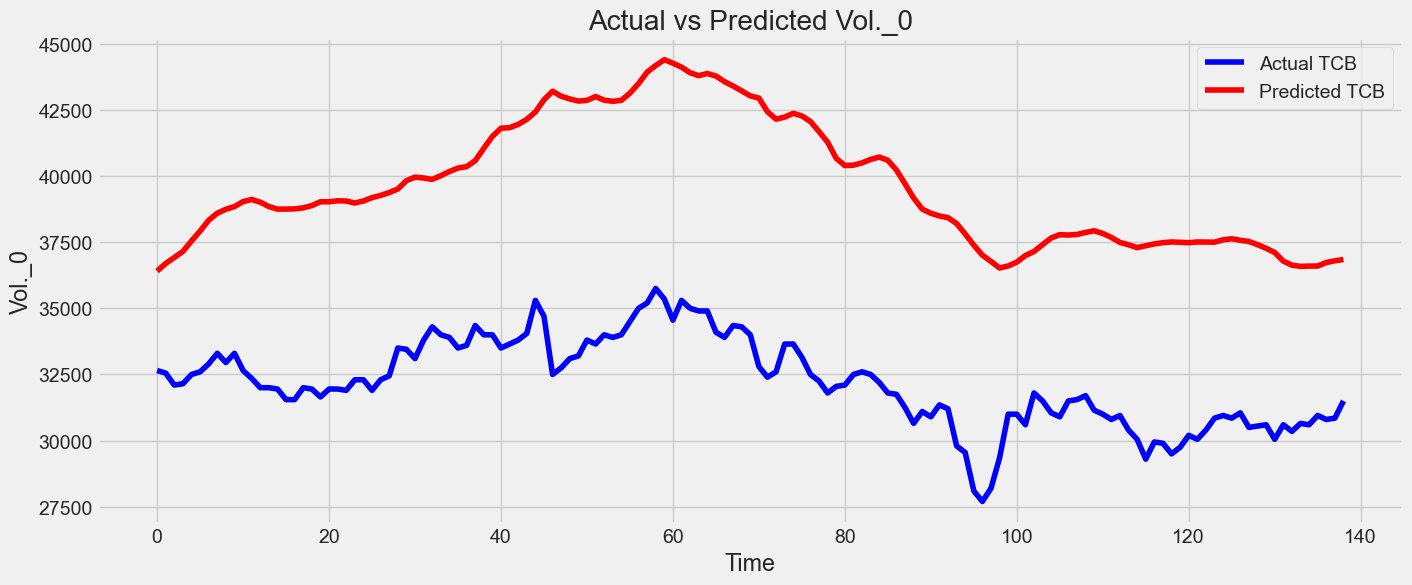

In [36]:
import matplotlib.pyplot as plt

# Tạo đồ thị so sánh giữa dự đoán và dữ liệu thực tế
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual TCB', color='blue')
plt.plot(predictions, label='Predicted TCB', color='red')
plt.xlabel('Time')
plt.ylabel('Vol._0')
plt.title('Actual vs Predicted Vol._0')
plt.legend()
plt.show()


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")



MAE: 7445.265737410072
RMSE: 7573.338342001088


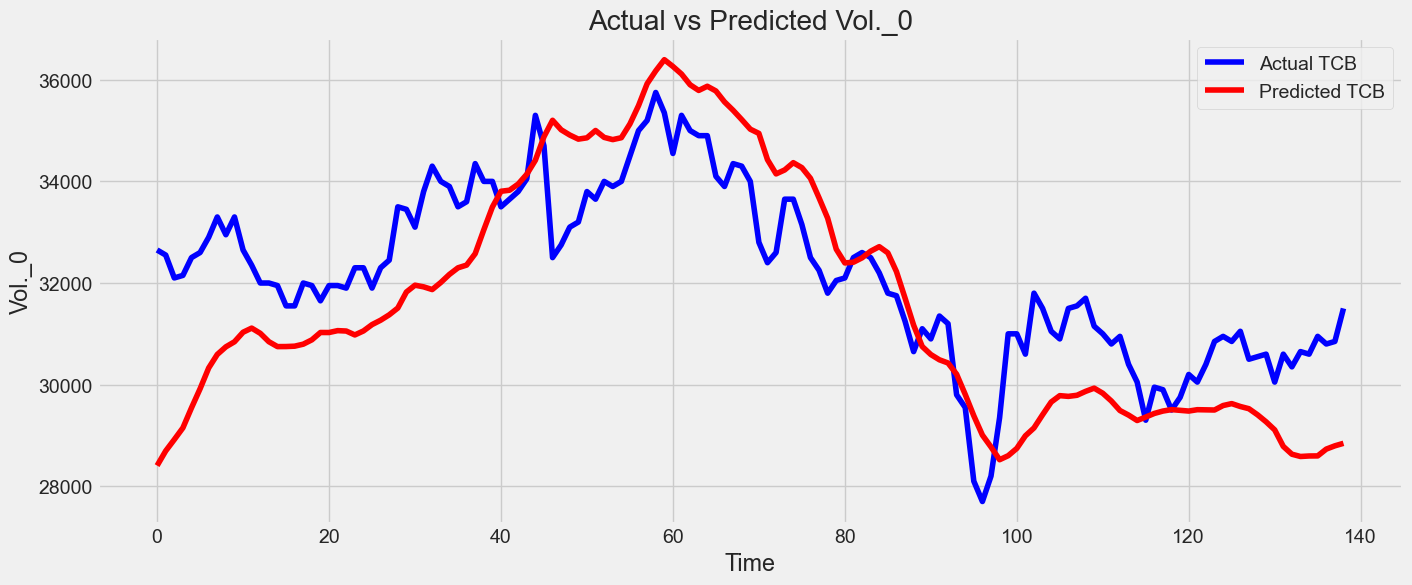

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual TCB', color='blue')
plt.plot(predictions-8000, label='Predicted TCB', color='red')
plt.xlabel('Time')
plt.ylabel('Vol._0')
plt.title('Actual vs Predicted Vol._0')
plt.legend()
plt.show()

Well done !!!


In [39]:
#Now we gonna using with Prophet model


from prophet import Prophet
from prophet.make_holidays import make_holidays_df

In [40]:
df_stock = data_bank[0].drop(['Vol._0'],axis= 1)
df_stock = df_stock.rename(columns={'Date': 'ds', 'Price_0': 'y'})
df_stock

,ds,y
999,2020-01-02,23800.0
998,2020-01-03,23650.0
997,2020-01-06,23050.0
996,2020-01-07,23200.0
995,2020-01-08,22750.0
...,...,...
4,2023-12-25,30950.0
3,2023-12-26,30800.0
2,2023-12-27,30850.0
1,2023-12-28,31500.0


In [41]:
tet_dates = {
    '2020': ['2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29'],
    '2021': ['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16'],
    '2022': ['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05'],
    '2023': ['2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26']
}


holiday_list = []
for year, dates in tet_dates.items():
    for date in dates:
        holiday_list.append({
            'holiday': 'Tet Nguyen Dan',
            'ds': pd.to_datetime(date),
            'lower_window': 0,
            'upper_window': 3
        })


holidays = pd.DataFrame(holiday_list)

In [42]:
company_internal = {
    'Date': ['Dec 31, 2023', 'Sep 30, 2023', 'Jun 30, 2023', 'Mar 31, 2023', 
             'Dec 31, 2022', 'Sep 30, 2022', 'Jun 30, 2022', 'Mar 31, 2022', 
             'Dec 31, 2021', 'Sep 30, 2021', 'Jun 30, 2021', 'Mar 31, 2021', 
             'Dec 31, 2020', 'Sep 30, 2020', 'Jun 30, 2020', 'Mar 31, 2020'],
    
    'Revenue (Billion)': [9383.16, 9473.52, 8517.90, 8765.44, 
                          8659.68, 9626.23, 10520.00, 9787.99, 
                          9531.79, 8190.22, 8608.29, 8080.90, 
                          7499.85, 6553.26, 5377.78, 5336.77],
    
    'Net Profit/Loss (Billion)': [723.48, -152.71, -1999.10, -1022.55, 
                                  -872.12, 1436.01, 1908.71, 1707.10, 
                                  2031.94, 1636.96, 3230.52, 2744.13, 
                                  1185.00, 1560.40, 759.19, 1112.29],
    
    'Growth (%)': [8.35, -1.59, -19.01, -10.45, 
                   -9.15, 17.53, 22.17, 21.13, 
                   27.09, 24.98, 60.07, 51.42, 
                   18.77, 31.25, 16.44, 26.33]
}

df_company = pd.DataFrame(company_internal)
df_company['Date'] = pd.to_datetime(df_company['Date'])

In [43]:
#Include 
df_stock['earnings_report'] = [1 if date in ['2023-02-15', '2024-03-15'] else 0 for date in df_stock['ds']]


22:58:50 - cmdstanpy - INFO - Chain [1] start processing
22:58:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\x\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\x\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


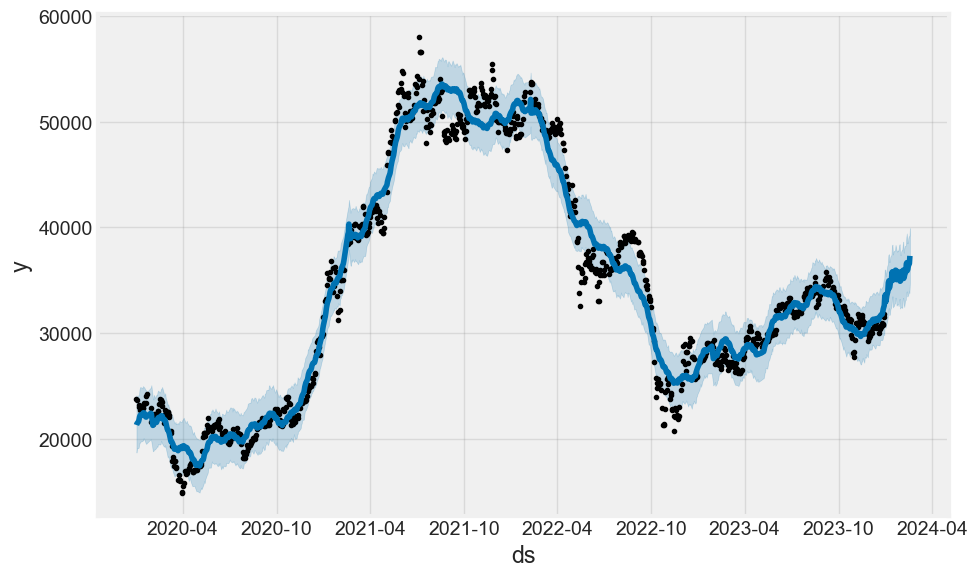

In [44]:
model = Prophet(holidays=holidays)
model.add_regressor('earnings_report')


model.fit(df_stock)


future = model.make_future_dataframe(periods=50)
future['earnings_report'] = [1 if date in ['2023-02-15', '2024-03-15'] else 0 for date in future['ds']]
forecast = model.predict(future)

# Vẽ đồ thị dự đoán
fig = model.plot(forecast)

In [45]:
x_test


array([[[ 0.03022828,  0.43202164,  0.01242964],
        [ 0.02520176,  0.44150354, -0.00211069],
        [ 0.03334819,  0.44782481,  0.00633208],
        ...,
        [ 0.06229401,  0.44466418,  0.11796435],
        [ 0.05172099,  0.44150354,  0.05440901],
        [ 0.08361339,  0.45414608,  0.19090056]],

       [[ 0.02520176,  0.44150354, -0.00211069],
        [ 0.03334819,  0.44782481,  0.00633208],
        [ 0.0316149 ,  0.45414608,  0.01219512],
        ...,
        [ 0.05172099,  0.44150354,  0.05440901],
        [ 0.08361339,  0.45414608,  0.19090056],
        [ 0.05744082,  0.46362798,  0.15853659]],

       [[ 0.03334819,  0.44782481,  0.00633208],
        [ 0.0316149 ,  0.45414608,  0.01219512],
        [ 0.02450845,  0.44782481,  0.03681989],
        ...,
        [ 0.08361339,  0.45414608,  0.19090056],
        [ 0.05744082,  0.46362798,  0.15853659],
        [ 0.1106526 ,  0.44782481,  0.16510319]],

       ...,

       [[ 0.07113375,  0.46678862,  0.17213884],
        [ 0

In [46]:
prophet_data = merged_data.copy().drop(['Vol._0','Price_3','Vol._3'],axis = 1)

In [47]:
prophet_data = prophet_data[split:]


In [48]:
prophet_data = prophet_data.reset_index()

In [49]:
prophet_data=prophet_data.rename(columns={'Date': 'ds', 'Price_0': 'y'})

In [50]:
prophet_data

,ds,y
0,2023-03-20,26250.0
1,2023-03-21,26350.0
2,2023-03-22,26200.0
3,2023-03-23,26200.0
4,2023-03-24,26450.0
...,...,...
195,2023-12-25,30950.0
196,2023-12-26,30800.0
197,2023-12-27,30850.0
198,2023-12-28,31500.0


In [51]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Tet Nguyen Dan,Tet Nguyen Dan_lower,Tet Nguyen Dan_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,22483.758000,18708.700323,24116.824144,22483.758000,22483.758000,0.0,0.0,0.0,-1172.054484,...,-120.947864,-120.947864,-120.947864,-1051.106620,-1051.106620,-1051.106620,0.0,0.0,0.0,21311.703516
1,2020-01-03,22451.212118,19120.669571,23883.655077,22451.212118,22451.212118,0.0,0.0,0.0,-1001.314316,...,-125.630127,-125.630127,-125.630127,-875.684189,-875.684189,-875.684189,0.0,0.0,0.0,21449.897802
2,2020-01-06,22353.574472,19134.424799,24150.022695,22353.574472,22353.574472,0.0,0.0,0.0,-713.581763,...,-345.142907,-345.142907,-345.142907,-368.438856,-368.438856,-368.438856,0.0,0.0,0.0,21639.992709
3,2020-01-07,22321.028590,19340.214820,24181.985018,22321.028590,22321.028590,0.0,0.0,0.0,-502.146925,...,-288.908220,-288.908220,-288.908220,-213.238705,-213.238705,-213.238705,0.0,0.0,0.0,21818.881665
4,2020-01-08,22288.482708,19640.109012,24679.912665,22288.482708,22288.482708,0.0,0.0,0.0,-213.388388,...,-144.960698,-144.960698,-144.960698,-68.427690,-68.427690,-68.427690,0.0,0.0,0.0,22075.094320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2024-02-13,35415.212756,33561.129002,38634.908138,34756.613492,35955.310451,0.0,0.0,0.0,686.696187,...,-288.908220,-288.908220,-288.908220,975.604407,975.604407,975.604407,0.0,0.0,0.0,36101.908943
1046,2024-02-14,35435.763589,33658.172629,38992.607841,34759.828528,35990.835854,0.0,0.0,0.0,922.844195,...,-144.960698,-144.960698,-144.960698,1067.804893,1067.804893,1067.804893,0.0,0.0,0.0,36358.607784
1047,2024-02-15,35456.314421,33957.994570,39186.257709,34763.092795,36045.884034,0.0,0.0,0.0,1033.017168,...,-120.947864,-120.947864,-120.947864,1153.965032,1153.965032,1153.965032,0.0,0.0,0.0,36489.331589
1048,2024-02-16,35476.865254,33811.236336,39189.301535,34765.436147,36093.492288,0.0,0.0,0.0,1106.393082,...,-125.630127,-125.630127,-125.630127,1232.023209,1232.023209,1232.023209,0.0,0.0,0.0,36583.258336


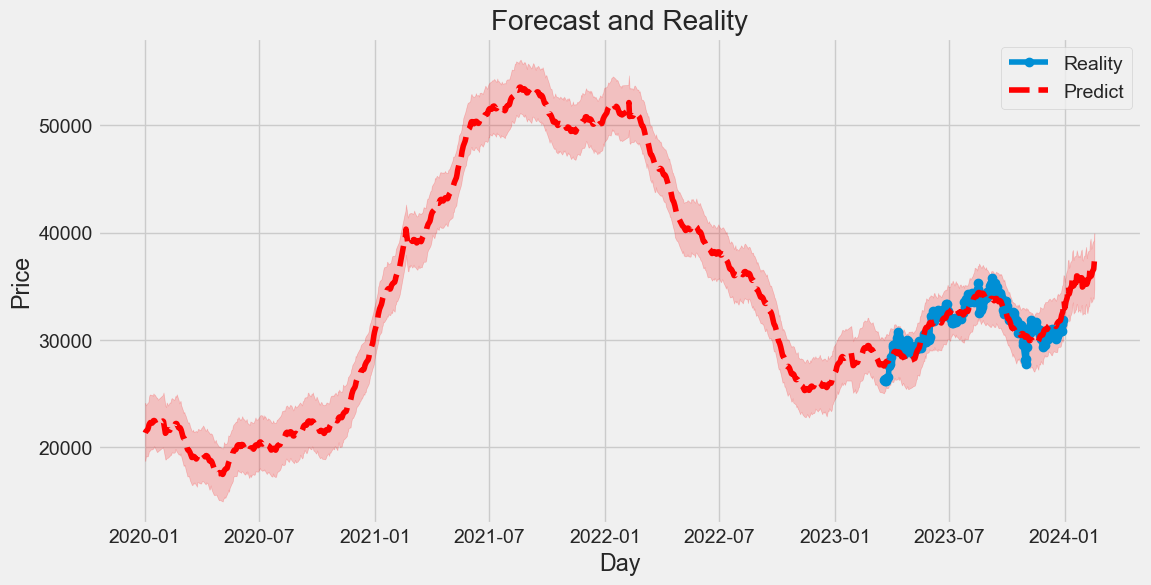

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Reality', marker='o')
plt.plot(forecast['ds'], forecast['yhat'], label='Predict', linestyle='--', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Forecast and Reality')
plt.legend()
plt.grid(True)
plt.show()

Seem nice !!!